In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Question 3: Newton-Cotes v.s. Gauss Quadrature

### (c) 

In [2]:
def function(k):
    f = lambda x: x**k
    return f

def Simpson(f, a, b):
    return ((b-a)/6)*(f(a)+4*f((a+b)/2)+f(b))

def Gauss(f):
    x0 = (5-15**(1/2))/10
    x1 = 1/2
    x2 = (5+15**(1/2))/10
    return (5/18)*f(x0)+(4/9)*f(x1)+(5/18)*f(x2)

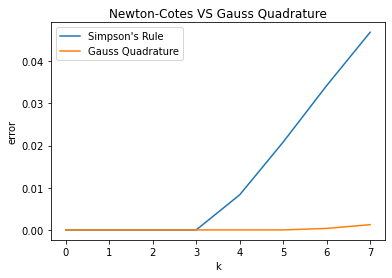

In [3]:
error_S = []
error_G = []
for k in range(8):
    I = 1/(k+1)
    f = function(k)
    error_S.append(abs(I - Simpson(f, 0, 1)))
    error_G.append(abs(I - Gauss(f)))
    
ks = [i for i in range(8)]
plt.figure()
plt.plot(ks, error_S, label = 'Simpson\'s Rule')
plt.plot(ks, error_G, label = 'Gauss Quadrature')
plt.title('Newton-Cotes VS Gauss Quadrature')
plt.xlabel('k')
plt.ylabel('error')
plt.legend()
plt.show()

### (d)

The error of Simpson's rule blows up when k increases. 
When n = 2, Gauss quadrature is exact up to degree 2n+1=5 and Newton-Cotes is only exact for polynomial of degree n = 2.

## Question 4: Orthogonal Polynomials on [ 0, ∞）

### (c) 

In [4]:
f1 = lambda x: np.exp(-x)
f2 = lambda x: np.exp(-x**2+x)
I1 = 1/2
I2 = np.pi**(1/2)/2

def Quadrature(f, n):
    if n == 2:
        X = [0.585786, 3.41421]
        W = [0.853553, 0.146447]
    elif n == 3:
        X = [0.415775, 2.29428, 6.28995]
        W = [0.711093, 0.278518, 0.0103893]
    elif n == 4:
        X = [0.322548, 1.74576, 4.53662, 9.39507]
        W = [0.603154, 0.357419, 0.0388879, 0.000539295]
    result = 0
    for i in range(len(X)):
        result += f(X[i])*W[i]
    return result

N = [2, 3, 4]
error_f1 = [abs(I1-Quadrature(f1, n)) for n in N]
error_f2 = [abs(I2-Quadrature(f2, n)) for n in N]
data = {'n': N, 'Error for the first interval': error_f1, 'Error for the second interval': error_f2}
pd.DataFrame(data)

,n,Error for the first interval,Error for the second interval
0,2,0.020036,0.201759
1,3,0.002697,0.034677
2,4,0.000344,0.038548
